## Primer Examen 10%
Un vehículo parte del reposo en un punto con una aceleración constante de $a_1$. 10 segundos después pasa por el mismo punto, y en la misma dirección, un segundo vehículo con una rapidez de 10 m/s y con aceleración constante $a_2$. Calcule el punto de encuentro: 
1. Gráficamente 
1. Encontrando las raíces del polinomio generado a partir de igualar las dos ecuaciones de movimiento.
1. Grafique el polinomio generado

_Ayuda:_
La ecuación de movimiento para el movimiento uniformemente acelerado es:
\begin{align}
x=x_0+v_0 (t-t_0)+\tfrac{1}{2} a (t-t_0)^2\,,
\end{align}
donde
* $x_0$ es la posición inicial
* $v_0$ es la rapidez inicial
* $t_0$ es el tiempo inicial

Ejecute la siguiente celda para fijar los valores de las aceleraciones en su caso

In [7]:
%pylab inline
import numpy as np
a1=np.random.choice([2,3,4,5,6])
a2=a1+4
print('a1={} m/s² and a2={} m/s²'.format(a1,a2))

Populating the interactive namespace from numpy and matplotlib
a1=5 m/s² and a2=9 m/s²


In [8]:
from scipy import optimize

Se establecen las condiciones iniciales y se definen las ecuaciones de movimiento

In [9]:
x0=0 #Posición inicial para 1 y 2
v0=10 #Velocidad inicial de 2
t0=10 #Tiempo inicial de 2

x1 = lambda t: x0+0.5*a1*t**2
x2 = lambda t: x0+v0*(t-t0)+0.5*a2*(t-t0)**2

## 1. Gráficamente

In [ ]:
plt.xlabel('Tiempo [s]', size=13)
plt.ylabel('Posición [m]', size=13)

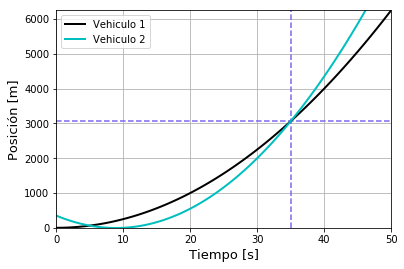

In [42]:
t = np.linspace(0,50,100)
plt.plot(t,x1(t), 'k', label="Vehiculo 1", linewidth=2)
plt.plot(t,x2(t), 'c', label="Vehiculo 2", linewidth=2)
plt.legend()
plt.vlines(35,0,x1(t).max(), 'mediumslateblue', linestyles='--')
plt.hlines(x1(35),0,t.max(), 'mediumslateblue', linestyles='--')
plt.xlabel('Tiempo [s]', size=13)
plt.ylabel('Posición [m]', size=13)
plt.xlim(0,50)
plt.ylim(0,x1(50))
plt.grid()

Gráficamente el punto de encuentro se da aproximadamente cuando t = 35 s a más de 3000 m 

## 2. Hallando las raíces del polinomio

Se define le polinomio y se hallan sus raíces con el método de Newton

In [28]:
x = lambda t: x1(t)-x2(t)
tf=optimize.newton(x,30) #Encuentra la raiz utilizando el metodo de Newton 
tf

35.0

In [29]:
print('El punto de encuentro es en x = {} m cuando t = {} s'.format(x1(tf),tf))

El punto de encuentro es en x = 3062.5 m cuando t = 35.0 s


## 3. Graficando el polinomio

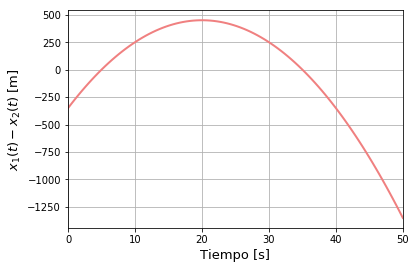

In [49]:
plt.plot(t,x(t), 'lightcoral', linewidth=2)
plt.xlabel('Tiempo [s]', size = 13)
plt.ylabel('$x_1(t)-x_2(t)$ [m]', size = 13)
plt.xlim(0,50)
plt.grid()

Así, se ve que después de t =10s el polinomio $x_1(t)-x_2(t)$ es 0 cuando t = 35s